In [33]:
import pandas as pd
import chartify
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [15]:
total = 582

In [16]:
with open("GDPR.json") as f:
    data = json.load(f)

In [17]:
perc = []
gui = []
ty =[]
for t in data.keys():
    for g in data[t].keys():
        v = data[t][g]/total
        perc.append(v)
        ty.append(t)
        gui.append(g)

In [18]:
data = pd.DataFrame({"Percentage":perc,"GDPR or Not?":ty,"FTC Guideline":gui})

In [23]:
data

,Percentage,GDPR or Not?,FTC Guideline
0,0.879725,GDPR,First Party Collection/Use
1,0.819588,GDPR,Third Party Sharing/Collection
2,0.955326,GDPR,Other
3,0.716495,GDPR,International and Specific Audiences
4,0.733677,GDPR,Data Security
5,0.805842,GDPR,User Choice/Control
6,0.587629,GDPR,"User Access, Edit and Deletion"
7,0.345361,GDPR,Data Retention
8,0.680412,GDPR,Policy Change
9,0.000000,GDPR,Do Not Track


In [20]:
labels=['First Party Collection/Use',
          'Third Party Sharing/Collection',
          'Other',
          'International and Specific Audiences',
          'Data Security',
          'User Choice/Control',
          'User Access, Edit and Deletion',
          'Data Retention',
          'Policy Change',
          'Do Not Track']

In [24]:
ch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
ch.set_title("FTC Guideline Distribution in Percentages")
ch.set_subtitle(
    "Y axis is Percentage of Policies having the mentioned Guideline")
from itertools import product
outside_groups = ["GDPR","NGDPR"]
inner_groups = labels
sort_order = list(product(outside_groups, inner_groups))
ch.plot.bar(
    data,
    categorical_columns=[ 'GDPR or Not?','FTC Guideline'],
    numeric_column='Percentage',
    color_column='FTC Guideline',
    categorical_order_by=sort_order)
ch.axes.set_xaxis_tick_orientation('vertical')
ch.set_legend_location('outside_bottom')
ch.show()

In [28]:
with open("sims.json") as f:
    data = json.load(f)

/Users/arjunth2001/opt/miniconda3/envs/op_project/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


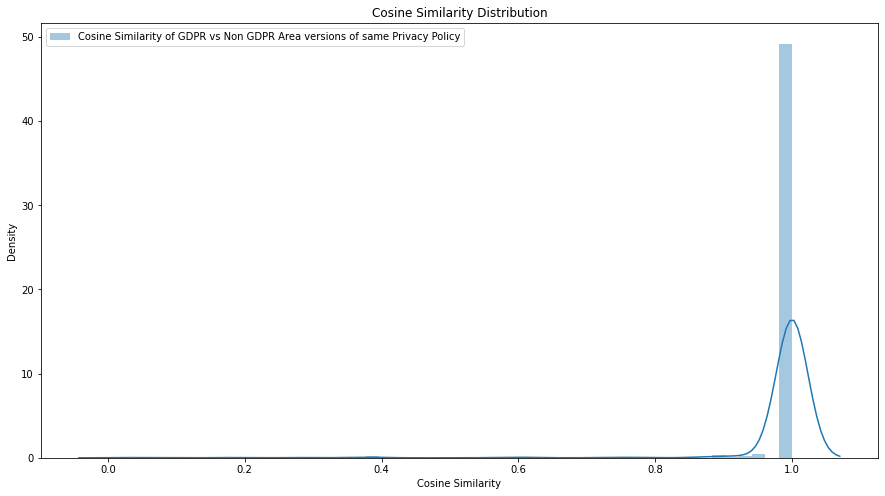

In [35]:
fig = plt.figure(figsize=(15,8))
fig.patch.set_facecolor("white")
ax = sns.distplot(data, label='Cosine Similarity of GDPR vs Non GDPR Area versions of same Privacy Policy')
plt.title("Cosine Similarity Distribution")
plt.xlabel("Cosine Similarity")
plt.ylabel("Density")
legend = plt.legend()
plt.savefig("images/sims.png",dpi=300)
plt.show()

In [38]:
count=[0,0,0]
for d in data:
    if d < 0.75:
        count[0]+=1
    elif d>=0.75 and d<1:
        count[1]+=1
    else:
        count[2]+=1

In [39]:
count

[10, 198, 374]

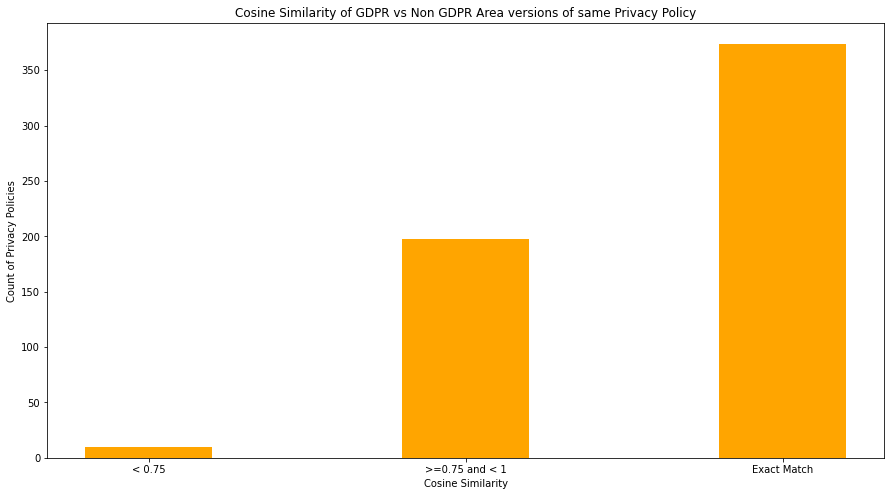

In [44]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
fig.patch.set_facecolor("white")
plt.bar(["< 0.75",">=0.75 and < 1", "Exact Match"], count, color ='orange',
        width = 0.4)
 
plt.xlabel("Cosine Similarity")
plt.ylabel("Count of Privacy Policies")
plt.title("Cosine Similarity of GDPR vs Non GDPR Area versions of same Privacy Policy")
plt.savefig("images/simbar.png",dpi=300)
plt.show()